# Student Information

Name: Lee De-yan

Student ID: 711233116

GitHub ID: D1e9a9n8

Kaggle name: Lee De-yan

Kaggle competition ranking: 39 /116

<img src = "./Kaggle_screenshot.png">

## 1. Data preparation

### 1.1 Load Data & Observation

In [2]:
import pandas as pd

In [3]:
# load id
id = pd.read_csv("./data/data_identification.csv")

In [4]:
# inspect data
print(id.shape) # record of id in test/train set 
id.head()

(1867535, 2)


,tweet_id,identification
0,0x28cc61,test
1,0x29e452,train
2,0x2b3819,train
3,0x2db41f,test
4,0x2a2acc,train


This **data_identification.csv** the table of test and train group for each id.

In [5]:
# load label (emotion) tag
emo = pd.read_csv("./data/emotion.csv")

In [6]:
# inspect data
print(emo.shape) # record of id in which emotion
emo.head()

(1455563, 2)


,tweet_id,emotion
0,0x3140b1,sadness
1,0x368b73,disgust
2,0x296183,anticipation
3,0x2bd6e1,joy
4,0x2ee1dd,anticipation


The **emotion.csv** provide the pridiction label for coresponding id. Here the rows of emotion is less than rows total id. That is beacuse the data provide only the training set emotion labels due to the Kaggle competition rules.

In [7]:
# load tweet info
tweet_info = pd.read_json("./data/tweets_DM.json", lines=True)

In [8]:
# inspect data
print(tweet_info.shape)
tweet_info.head()

(1867535, 5)


,_score,_index,_source,_crawldate,_type
0,391,hashtag_tweets,"{'tweet': {'hashtags': ['Snapchat'], 'tweet_id...",2015-05-23 11:42:47,tweets
1,433,hashtag_tweets,"{'tweet': {'hashtags': ['freepress', 'TrumpLeg...",2016-01-28 04:52:09,tweets
2,232,hashtag_tweets,"{'tweet': {'hashtags': ['bibleverse'], 'tweet_...",2017-12-25 04:39:20,tweets
3,376,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x1cd5...",2016-01-24 23:53:05,tweets
4,989,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x2de2...",2016-01-08 17:18:59,tweets


The **tweets_DM.json** provides the comment information and some other related informations.

In [9]:
print(type(tweet_info['_source'][0]))
tweet_info['_source'][0]

<class 'dict'>


{'tweet': {'hashtags': ['Snapchat'],
  'tweet_id': '0x376b20',
  'text': 'People who post "add me on #Snapchat" must be dehydrated. Cuz man.... that\'s <LH>'}}

In [10]:
tweet_info['_source'][0]['tweet']

{'hashtags': ['Snapchat'],
 'tweet_id': '0x376b20',
 'text': 'People who post "add me on #Snapchat" must be dehydrated. Cuz man.... that\'s <LH>'}

We would like to extract the text and tweet_id information for each dictionary in the '_source' column.

In [11]:
# set length of column "_source"
source = len(tweet_info['_source'])

# extract id in all source 
tweet_id = [tweet_info['_source'][i]['tweet']['tweet_id'] for i in range(source)]

# extract comment in all source 
tweet_text = [tweet_info['_source'][i]['tweet']['text'] for i in range(source)]

In [12]:
# build up dataframe with id and comment
comment = pd.DataFrame({'tweet_id': tweet_id, 'text': tweet_text})

In [13]:
print(comment.shape)
comment.head()

(1867535, 2)


,tweet_id,text
0,0x376b20,"People who post ""add me on #Snapchat"" must be ..."
1,0x2d5350,"@brianklaas As we see, Trump is dangerous to #..."
2,0x28b412,"Confident of your obedience, I write to you, k..."
3,0x1cd5b0,Now ISSA is stalking Tasha 😂😂😂 <LH>
4,0x2de201,"""Trust is not the same as faith. A friend is s..."


In [14]:
# combine data by id
df = id.merge(emo, on='tweet_id', how='outer').merge(comment, on='tweet_id', how='outer')
df.shape

(1867535, 4)

In [15]:
# inspect data
df.head()

,tweet_id,identification,emotion,text
0,0x28cc61,test,NaN,@Habbo I've seen two separate colours of the e...
1,0x29e452,train,joy,Huge Respect🖒 @JohnnyVegasReal talking about l...
2,0x2b3819,train,joy,Yoooo we hit all our monthly goals with the ne...
3,0x2db41f,test,NaN,@FoxNews @KellyannePolls No serious self respe...
4,0x2a2acc,train,trust,@KIDSNTS @PICU_BCH @uhbcomms @BWCHBoss Well do...


### 1.2 Build up train and test set

In [16]:
# group by identification label
train_df = df[df['identification']=='train']
test_df = df[df['identification']=='test']

In [17]:
# insepect training set
print(train_df.shape)
train_df.head()

(1455563, 4)


,tweet_id,identification,emotion,text
1,0x29e452,train,joy,Huge Respect🖒 @JohnnyVegasReal talking about l...
2,0x2b3819,train,joy,Yoooo we hit all our monthly goals with the ne...
4,0x2a2acc,train,trust,@KIDSNTS @PICU_BCH @uhbcomms @BWCHBoss Well do...
5,0x2a8830,train,joy,Come join @ambushman27 on #PUBG while he striv...
6,0x20b21d,train,anticipation,@fanshixieen2014 Blessings!My #strength little...


In [ ]:
import numpy as np

# check any missing value in train set
np.sum(train_df.isnull(), axis = 0)

tweet_id          0
identification    0
emotion           0
text              0
dtype: int64

In [ ]:
# inspect testing set
print(test_df.shape)
test_df.head()

(411972, 4)


,tweet_id,identification,emotion,text
0,0x28cc61,test,NaN,@Habbo I've seen two separate colours of the e...
3,0x2db41f,test,NaN,@FoxNews @KellyannePolls No serious self respe...
15,0x2466f6,test,NaN,"Looking for a new car, and it says 1 lady owne..."
23,0x23f9e9,test,NaN,@cineworld “only the brave” just out and fount...
31,0x1fb4e1,test,NaN,Felt like total dog 💩 going into open gym and ...


In [ ]:
# check any missing value in test set
np.sum(test_df.isnull(), axis = 0)
# emotion label is all missing due to the rule of Kaggle competition

tweet_id               0
identification         0
emotion           411972
text                   0
dtype: int64

In [ ]:
# shuffle dataset
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)

# 2. Exploratory data analysis (EDA)

In [33]:
# group to find distribution
train_df.groupby(['emotion']).count()['text']

emotion
anger            39867
anticipation    248935
disgust         139101
fear             63999
joy             516017
sadness         193437
surprise         48729
trust           205478
Name: text, dtype: int64

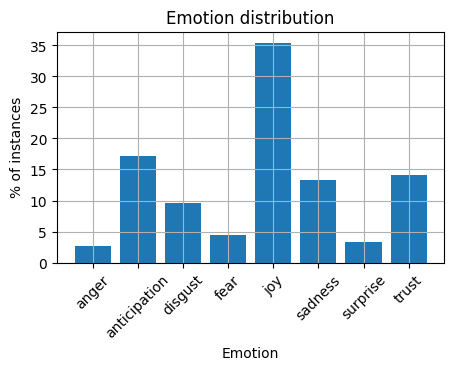

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# the histogram of the data
labels = train_df['emotion'].unique()
post_total = len(train_df)
df_plot = train_df.groupby(['emotion']).count()['text']
df_plot = df_plot.apply(lambda x: round(x*100/post_total,3))

# plot
fig, ax = plt.subplots(figsize=(5,3))
plt.bar(df_plot.index,df_plot.values)

# set title and layout
plt.ylabel('% of instances')
plt.xlabel('Emotion')
plt.xticks(rotation=45)
plt.title('Emotion distribution')
plt.grid(True)
plt.show()

# 3. Feature Engineering
### Tensorflow Tokenizer

### 3.1 Tokenize Comment

In [ ]:
# import libary
%matplotlib inline

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [28]:
# use tensorflow pre-build tokenizer
from tensorflow.keras.preprocessing.text import Tokenizer

# tokenize top 8,000 frequent words in all tweet comment

tokenizer = Tokenizer(num_words=8000, oov_token='')

tokenizer.fit_on_texts(train_df['text'])

In [ ]:
# observe the tokenize reslut 
print([train_df['text'][1]])
print(tokenizer.texts_to_sequences([train_df['text'][1]]))

['Huge Respect🖒 @JohnnyVegasReal talking about losing his dad to cancer."if you dont remember the good times it was all for nothing"#beautiful']
[[824, 1, 1, 515, 56, 1225, 80, 613, 4, 1917, 46, 7, 556, 347, 3, 53, 322, 16, 40, 26, 9, 190, 201]]


Tokenzier will change the comment into a sequence of number vector. The length of vector is related to the numbers of words in a comment. Different comments may yield differnet length of vector which will cause model training issue. 

### 3.2 Create same-length padding data for training

In order to unify the length for all comment tokenization results. We like to prune the length for vector and try to keep most information as we could. Here we wolud like to use the histogram for us  to decide how long would be appropriate for all the comments. 

In [ ]:
# count how many words in each comments
comment_num = []
for t in train_df['text']:
    words = t.split(' ')
    comment_num.append(len(words))


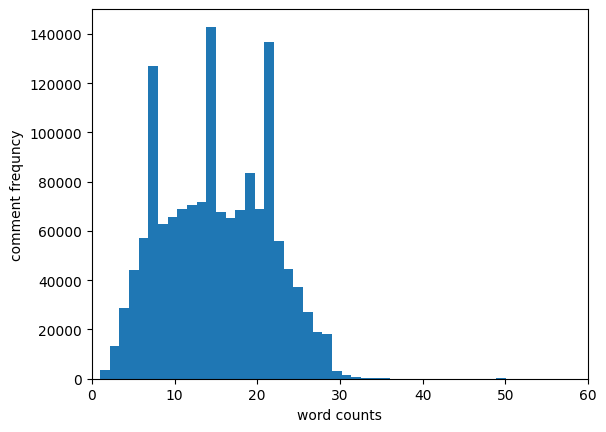

In [37]:
plt.hist(comment_num, bins=len(set(comment_num)))
plt.xlim(0, 60)
plt.xlabel('word counts')
plt.ylabel('comment frequncy')
plt.show()

In [38]:
print('max length :',np.max(comment_num))
print('mediian length :',np.median(comment_num))
print('99% quantile :',np.percentile(comment_num, 99))

max length : 105
mediian length : 15.0
99% quantile : 28.0


From the histogram and the 99% quantile we would like to choose 40 as a length cretria, we could preserve most of comment infrormation and prune the comment into same length.

In [42]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [147]:
train_seq = tokenizer.texts_to_sequences(train_df['text'])
train_padded_seq = pad_sequences(train_seq, truncating='post', maxlen=40, padding='post')

In [ ]:
print(train_padded_seq.shape)

(1455563, 40)


### 3.2 One-hot encoding for emotion label

In [39]:
# import package
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

In [ ]:
# turn emotion into category number 
onehot = LabelEncoder()
train_encoded = onehot.fit_transform(train_df['emotion'])

# turn category number into One-Hot encoding
train_onehot = to_categorical(train_encoded)

In [ ]:
# check the transform results each of category will trun into a sparse vector
print(train_onehot.shape)
train_onehot

(1455563, 8)


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

# 4. Model Training

### 4.1 Build Model

Here we would like to build the LSTM model. The LSTM model addresses the shortcomings of RNNs. It can capture the relationships within words. Compared to the BERT model, LSTM is more hardware-friendly in terms of computational requirements

In [149]:
# I/O check
input_shape = train_padded_seq.shape[1]
print('input_shape: ', input_shape)

output_shape = len(onehot.classes_)
print('output_shape: ', output_shape)

input_shape:  40
output_shape:  8


In [63]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense

In [150]:
# feed-forward model
model = Sequential()

# Embedding layer
model.add(Embedding(input_dim=8000, output_dim=16, input_length=input_shape))

# 1st Bidirectional LSTM layer
model.add(Bidirectional(LSTM(64, return_sequences=True)))

# 2st Bidirectional LSTM layer
model.add(Bidirectional(LSTM(32)))

# Dense layer
model.add(Dense(output_shape, activation='softmax'))

# build up model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# show model structure
model.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_13 (Embedding)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_28                │ ?                      │   0 (unbuilt) │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_29                │ ?                      │   0 (unbuilt) │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

### 4.2 Train Model

In [ ]:
# Set the epoch and batch size 
epochs = 5
batch_size = 32

history = model.fit(
                    train_padded_seq, train_onehot,
                    epochs = epochs,
                    batch_size = batch_size,
                    validation_split=0.2,
                    verbose = 1
)

print('training finish')

Epoch 1/5
36390/36390 ━━━━━━━━━━━━━━━━━━━━ 1506s 41ms/step - accuracy: 0.5149 - loss: 1.3426 - val_accuracy: 0.5726 - val_loss: 1.1802
Epoch 2/5
36390/36390 ━━━━━━━━━━━━━━━━━━━━ 1517s 42ms/step - accuracy: 0.5890 - loss: 1.1406 - val_accuracy: 0.5880 - val_loss: 1.1342
Epoch 3/5
36390/36390 ━━━━━━━━━━━━━━━━━━━━ 1473s 40ms/step - accuracy: 0.6046 - loss: 1.0933 - val_accuracy: 0.5945 - val_loss: 1.1198
Epoch 4/5
36390/36390 ━━━━━━━━━━━━━━━━━━━━ 1474s 41ms/step - accuracy: 0.6160 - loss: 1.0626 - val_accuracy: 0.5977 - val_loss: 1.1157
Epoch 5/5
36390/36390 ━━━━━━━━━━━━━━━━━━━━ 1496s 41ms/step - accuracy: 0.6222 - loss: 1.0457 - val_accuracy: 0.5986 - val_loss: 1.1127
training finish


### 4.3 Save Model

In [119]:
# Save model
model.save('model_ver4.keras')

# Testing Prediction

In [ ]:
# transform the test dataframe into model input
test_seq = tokenizer.texts_to_sequences(test_df['text'])
test_padded_seq = pad_sequences(test_seq, truncating='post', maxlen=50, padding='post')

In [ ]:
# try to predict the emotion categories for test data
predict = model.predict(test_padded_seq)


12875/12875 ━━━━━━━━━━━━━━━━━━━━ 127s 10ms/step


In [ ]:
# reverse the one-hot encoding result into emotion
y_pred_labels = onehot.inverse_transform(predict.argmax(axis=1))

# Output Submission

In [ ]:
# Save prediction result into dataframe (Form of Kaggle Submision)
submission = pd.DataFrame({'id': test_df['tweet_id'], 'emotion': y_pred_labels})

In [ ]:
# save as csv file for submission 
submission.to_csv('submission_ver4.csv', index=False) #submission.csv